# Экзамен
# "Инструментальные средства моделирования"
## Выполнил:
## МАЛЮТИН А.А. БПМ-152

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import scipy.optimize
import scipy.spatial
import matplotlib.pyplot as plt
%matplotlib inline

# №0

    K.U = F
    K - матрица жескости (2n*2n)
    U - перемещения (2n)
    F - сила (2n)

# №1

In [132]:
def plot_contour_map(Nodes, simplices, NodeS1):
    
    plt.figure(figsize=(8,8))
    
    handle = plt.tricontourf(Nodes[:,0], Nodes[:, 1], simplices, NodeS1.ravel(), cmap='jet') #fill
    
    plt.tricontour(Nodes[:, 0], Nodes[:, 1], simplices, NodeS1.ravel(), colors='k') #contours
    
    cb = plt.gcf().colorbar(handle)
    plt.title('Поле главных напряжений в узлах, Н/см$^2$')
    plt.xlabel('X, см')
    plt.ylabel('Y, см')
    plt.axis('equal')

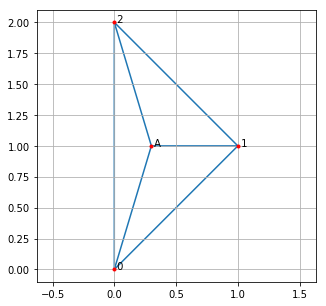

In [133]:
border = np.array([
    [0, 0],
    [1, 1],
    [0, 2],
    [0, 0]
])

inner = np.array([[0.3, 1]])

Nodes = np.vstack((border[:-1], inner))

trng = scipy.spatial.Delaunay(Nodes)

simplices = trng.simplices.copy()

NodeS1 = np.array([1, 2, 1, 4])

plt.figure(figsize=(5, 5))
plt.triplot(Nodes[:,0],Nodes[:,1],simplices)
plt.plot(Nodes[:,0],Nodes[:,1],'.',c='r')
for i, p in enumerate(Nodes[:-1]):
    plt.text(p[0], p[1], ' %d'%i)
    
plt.text(Nodes[-1, 0], Nodes[-1, 1], ' A', withdash=True)
plt.axis('equal')
plt.grid(True)

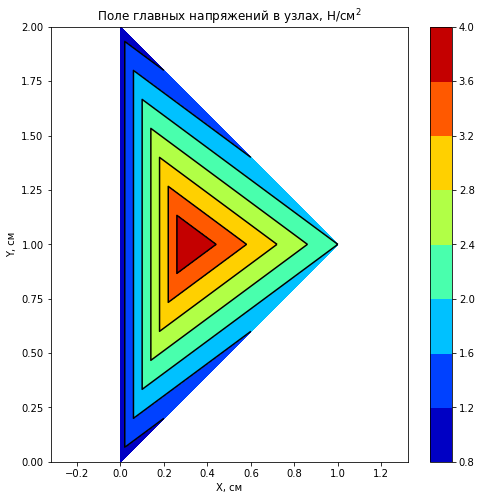

In [134]:
plot_contour_map(Nodes, simplices, NodeS1)

# №2

    # расчет матрицы градиентов
    trng_vertices = nodes[simplices] # Пересчитаем, т.к. надо учитывать маски
    A = triarea(trng_vertices[:,0], trng_vertices2[:,1], trng_vertices2[:,2]) # площади треугольников
    b = trng_vertices[:, [1,2,0], 1] - trng_vertices[:, [2, 0, 1], 1]
    c = trng_vertices[:, [2,0,1], 0] - trng_vertices[:, [1, 2, 0], 0]
    z = np.zeros_like(b[:,0])
    
        / b0,  0, b1,  0, b2,  0 \
    B = |  0, c0,  0, c1,  0, c2 |  # матрица градиентов
        \ c0, b0, c1, b1, c2, b2 /
    
    B1 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis=1)
    B2 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis=1)
    B3 = np.stack((c[:,0], b[:,0], c[:,1], b[:,1], c[:,2], b[:,2]), axis=1)
    B = np.stack((B1, B2, B3), axis=1)
    
    
    #расчет локальных матриц жесткости
    coef = 1/(2*A)
    B *= coef.reshape(-1, 1, 1)
    D = e / (1 - mu**2) * np.array([[1,mu,0], [mu,1,0], [0,0,0.5*(1-mu)]]) # матрица упругих постоянных
    BT = np.transpose(B, axes=(0,2,1))
    Ke = BT.D.B * V
    Ke = np.matmul(np.matmul(BT, D), B) * t * A.reshape(-1, 1, 1)
    
    
    # Строим Elements Freedom Table
    coords0 = simplices[:, 0].reshape(-1, 1)
    coords1 = simplices[:, 1].reshape(-1, 1)
    coords2 = simplices[:, 2].reshape(-1, 1)
    EFT = np.hstack((coords0*2, coords0*2+1, coords1*2, coords1*2+1, coords2*2, coords2*2+1))
    
    # расчет глобальной матрицы жесткости
    K = np.zeros((2*Nn, 2*Nn))
    for i in range(simplices.shape[0]):
        K[EFT[i, np.newaxis].T, EFT[i]] += Ke[i]


    # расчет силы, действующей на элементы
    F = np.zeros(2*Nn)
    F = ...

    # расчет перемещений
    U = np.linalg.solve(K, F)

    # расчет напряжений и главных напряжений
    Ue = U[EFT, None] # матрица перемещений
    Eps = np.matmul(B, Ue) # тензор деформаций

# Задача

E = 100 ГПа

$\mu$ = 0.1

$t$ = 1 см

## Построение

In [139]:
def show_parts(*parts, **kwargs):
    plt.figure(figsize=(5, 5))
    plt.grid(True)
    plt.axis('equal')
    for part in parts:
        plt.plot(part[:,0],part[:,1], 'o-', c='r')

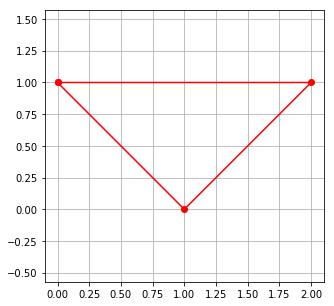

In [140]:
border = np.array([
    [0, 1],
    [2, 1],
    [1, 0],
    [0, 1]
])

show_parts(border)

## Построение триангуляции

In [141]:
Nodes = border[:-1]

In [142]:
Nodes.shape

(3, 2)

In [143]:
simplices = scipy.spatial.Delaunay(Nodes).simplices

(-0.1, 2.1, -0.05, 1.05)

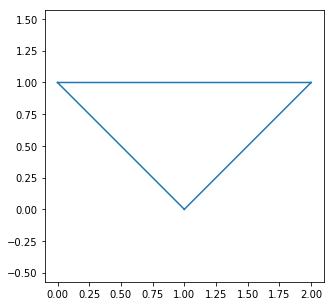

In [144]:
plt.figure(figsize=(5, 5))
plt.triplot(Nodes[:,0], Nodes[:,1], simplices)
plt.axis('equal')

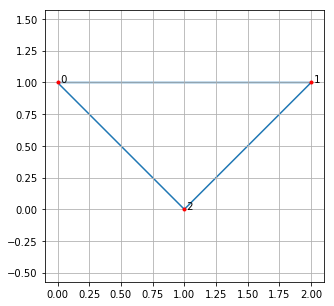

In [145]:
plt.figure(figsize=(5, 5))
plt.triplot(Nodes[:,0],Nodes[:,1],simplices)
plt.plot(Nodes[:,0],Nodes[:,1],'.',c='r')
for i, p in enumerate(Nodes):
    plt.text(p[0], p[1], ' %d'%i)
    
plt.axis('equal')
plt.grid(True)

In [146]:
def triarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:,0]*ac[:,1] - ab[:,1]*ac[:,0])

In [147]:
def FEM(nodes, simplices, e, mu, t, f, dof):
    # расчет матрицы градиентов
    trng_vertices2 = nodes[simplices] # Пересчитаем, т.к. надо учитывать маски
    A = triarea(trng_vertices2[:,0], trng_vertices2[:,1], trng_vertices2[:,2]) # площади треугольников
    
    b = trng_vertices2[:, [1,2,0], 1] - trng_vertices2[:, [2, 0, 1], 1]
    c = trng_vertices2[:, [2,0,1], 0] - trng_vertices2[:, [1, 2, 0], 0]
    z = np.zeros_like(b[:,0])
    B1 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis=1)
    B2 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis=1)
    B3 = np.stack((c[:,0], b[:,0], c[:,1], b[:,1], c[:,2], b[:,2]), axis=1)
    B = np.stack((B1, B2, B3), axis=1).astype(np.float64) # матрица градиентов
    
    
    # расчет глобальной матрицы жесткости
    coef = 1 / (2 * A)
    coef = coef.astype(np.float64)
    B *= coef.reshape(-1, 1, 1)
    D = e / (1 - mu**2)*np.array([[1,mu,0], [mu,1,0], [0,0,0.5*(1-mu)]])
    BT = np.transpose(B, axes=(0,2,1))
    Ke = np.matmul(np.matmul(BT, D), B)*t*A.reshape(-1, 1, 1)
    coords0 = simplices[:, 0].reshape(-1, 1)
    coords1 = simplices[:, 1].reshape(-1, 1)
    coords2 = simplices[:, 2].reshape(-1, 1)
    EFT = np.hstack((coords0*2, coords0*2+1, coords1*2, coords1*2+1, coords2*2, coords2*2+1))

    
    Nn = Nodes.shape[0]
    K = np.zeros((2*Nn, 2*Nn))
    for i in range(simplices.shape[0]):
        K[EFT[i, np.newaxis].T, EFT[i]] += Ke[i]

    K[dof,:] = 0
    K[:,dof] = 0
    K[dof,dof] = 1
    
    
    # расчет силы, действующей на элементы
    F = np.zeros(2*Nn)

    F = f
    
    F[dof] = 0
    
    # расчет перемещений
    U = np.linalg.solve(K, F)
    
    # расчет напряжений и главных напряжений
    Ue = U[EFT, None] # матрица перемещений
    Eps = np.matmul(B, Ue) # тензор деформаций
    Sig = np.matmul(D, Eps) # тензор напряжений
    NodeA = np.zeros((Nn,1)) 
    NodeSig = np.zeros((Nn,3))
    for i, e in enumerate(simplices):
        NodeSig[e] += Sig[i].T*A[i]
        NodeA[e] += A[i]
    NodeSig /= NodeA
    NodeS1 = 0.5*(NodeSig[:,0]+NodeSig[:,1])+\
         np.sqrt((0.5*(NodeSig[:,0]-NodeSig[:,1]))**2+NodeSig[:,2]**2)
    
    return U, NodeS1

In [174]:
def plot_contour_map2(Nodes, ResNodes, border, simplices, NodeS1):
    plt.figure(figsize=(5, 5))
    plt.grid(True)
    
    handle = plt.tricontourf(ResNodes[:,0], ResNodes[:, 1], simplices, NodeS1.ravel(), cmap='jet')
    
    plt.plot(Nodes[:,0],Nodes[:,1],'.',c='r')
    plt.plot(ResNodes[:,0],ResNodes[:,1],'.',c='g')
    plt.plot(border[:,0],border[:,1],'r','-')

    plt.title('Поле главных напряжений в узлах, Н/см$^2$')
    plt.xlabel('X, см')
    plt.ylabel('Y, см')
    plt.axis('equal')
    plt.ylim((-1,2))

In [175]:
U, _ = FEM(Nodes,
           simplices,
           e = 100,
           mu = 0.1,
           t = 1, 
           f = np.array([0, 0, 0, -1, 0, 0]),
           dof = np.array([0, 1, 5])
          )

print("U = \n", U.reshape(-1, 2))

U = 
 [[ 0.     0.   ]
 [ 0.004 -0.04 ]
 [-0.018  0.   ]]


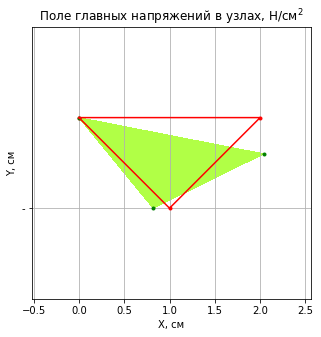

In [176]:
ResNodes = Nodes + 10 * U.reshape(-1, 2)

plot_contour_map2(Nodes, ResNodes, border, simplices, NodeS1)